In [18]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt 
from prophet import Prophet 

In [19]:
dados = yf.download('JNJ', start='2023-01-01', end='2023-12-31', progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,176.160004,178.380005,176.009995,178.190002,171.638855,6344900
1,2023-01-04,178.889999,180.190002,178.479996,180.130005,173.507523,9788800
2,2023-01-05,179.020004,179.990005,178.410004,178.800003,172.226425,6255300
3,2023-01-06,180.130005,180.929993,179.389999,180.250000,173.623108,5706000
4,2023-01-09,179.300003,179.759995,175.179993,175.580002,169.124802,7925300
...,...,...,...,...,...,...,...
245,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
246,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
247,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
248,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [20]:
dados.columns = ['Data', 'Abertura', 'Maxima', 'Minima', 'Fechamento', 'Fech_Ajuste', 'Volume']
dados

,Data,Abertura,Maxima,Minima,Fechamento,Fech_Ajuste,Volume
0,2023-01-03,176.160004,178.380005,176.009995,178.190002,171.638855,6344900
1,2023-01-04,178.889999,180.190002,178.479996,180.130005,173.507523,9788800
2,2023-01-05,179.020004,179.990005,178.410004,178.800003,172.226425,6255300
3,2023-01-06,180.130005,180.929993,179.389999,180.250000,173.623108,5706000
4,2023-01-09,179.300003,179.759995,175.179993,175.580002,169.124802,7925300
...,...,...,...,...,...,...,...
245,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
246,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
247,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
248,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [25]:
dados_treino = dados[dados['Data'] < '2023-07-31']
dados_teste = dados[dados['Data'] >= '2023-07-31']


In [26]:
dados_prophet_treino = dados_treino[['Data', 'Fechamento']].rename(columns={'Data': 'ds', 'Fechamento': 'y'})

In [28]:
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

16:43:20 - cmdstanpy - INFO - Chain [1] start processing
16:43:20 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

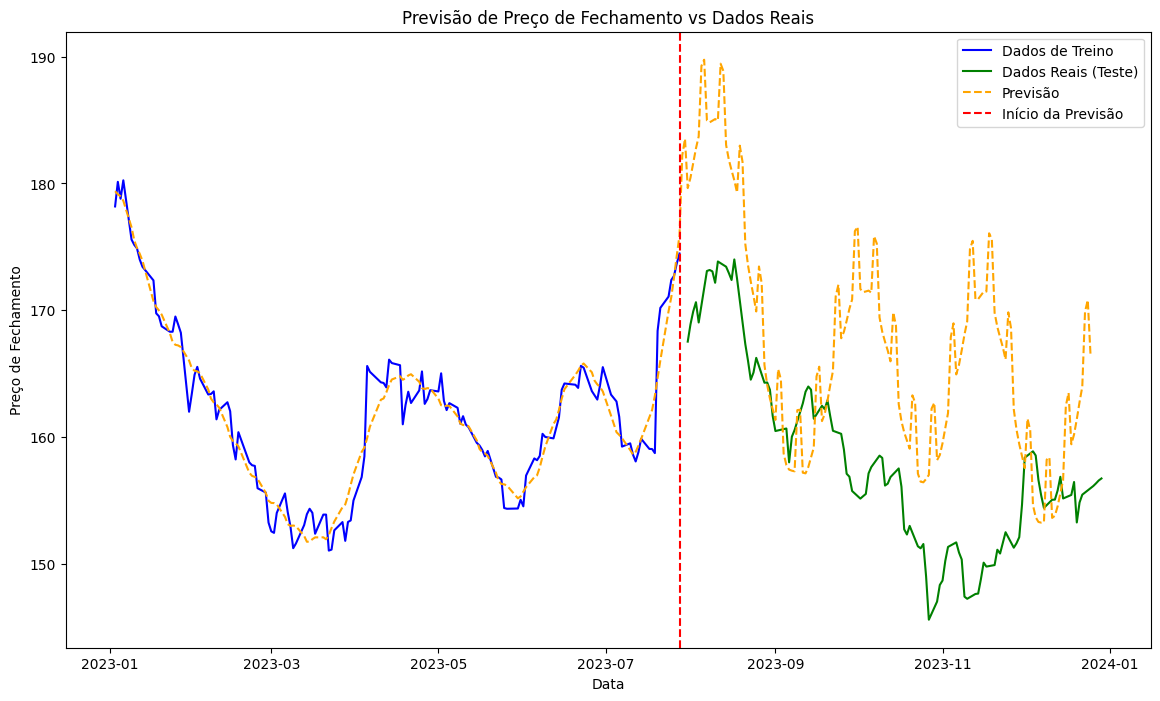

In [33]:
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Data'], dados_treino['Fechamento'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Data'], dados_teste['Fechamento'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Data'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()